In [1]:
!pip uninstall -y numpy
!pip uninstall -y nltk
!pip install numpy
!pip install nltk

Found existing installation: numpy 1.25.2
Uninstalling numpy-1.25.2:
  Successfully uninstalled numpy-1.25.2
Found existing installation: nltk 3.8.1
Uninstalling nltk-3.8.1:
  Successfully uninstalled nltk-3.8.1
  Using cached numpy-1.25.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.2 which is incompatible.


  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)


In [2]:
# !pip install numpy==1.23.3

In [3]:
# !pip uninstall -y pandas

In [4]:
# !pip install pandas==0.17.0 --index-url https://pypi.org/simple/

In [5]:
#  !pip uninstall -y pandas

In [6]:
# !pip install pandas==1.5.3

In [7]:
!pip install kaleido

In [8]:
# import packages
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [9]:
pip install matplotlib

In [10]:
data = pd.read_csv("/content/drive/MyDrive/images-classification/Flipkart/flipkart_com-ecommerce_sample_1050.csv")

In [11]:
#Treatment of categories
def split_categories(category, level):
    '''Fonction qui affiche les '''
    category = category.split('["')[1].split('"]')[0]
    cat = category.split(' >> ')
    if(len(cat)) < 3:
        cat = [cat[0], cat[1], 'None']
        if(len(cat))<2:
            cat = [cat[0], 'None', 'None']
    return cat[level]

def split_categories_1(category):
    return split_categories(category,0)
def split_categories_2(category):
    return split_categories(category,1)
def split_categories_3(category):
    return split_categories(category,2)

def detail_categories(dataframe):
    dataframe['cat_lvl_1'] = dataframe['product_category_tree'].apply(split_categories_1)
    dataframe['cat_lvl_2'] = dataframe['product_category_tree'].apply(split_categories_2)
    dataframe['cat_lvl_3'] = dataframe['product_category_tree'].apply(split_categories_3)
    return dataframe.drop(['product_category_tree'], axis=1)

In [12]:
data = detail_categories(data)

In [13]:
data.to_csv('saved_data_categories.csv',sep=',',index = True)

In [14]:
data['cat_lvl_1'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

In [15]:
data['Cluster_cat']=''

def assign_cluster(df):

        df.loc[df.eval("cat_lvl_1 == 'Baby Care'"), "Cluster_cat"]                =0
        df.loc[df.eval("cat_lvl_1 == 'Beauty and Personal Care'"), "Cluster_cat"] =1
        df.loc[df.eval("cat_lvl_1 == 'Computers'"), "Cluster_cat"]                =2
        df.loc[df.eval("cat_lvl_1 == 'Home Decor & Festive Needs'"), "Cluster_cat"]=3
        df.loc[df.eval("cat_lvl_1 == 'Home Furnishing'"), "Cluster_cat"]          =4
        df.loc[df.eval("cat_lvl_1 == 'Kitchen & Dining'"), "Cluster_cat"]          =5
        df.loc[df.eval("cat_lvl_1 == 'Watches'"), "Cluster_cat"]                  =6

        return df

assign_cluster(data)

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,cat_lvl_1,cat_lvl_2,cat_lvl_3,Cluster_cat
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,Curtains,4
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin,Baby Bath Towels,0
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,Baby Bath & Skin,Baby Bath Towels,0
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Bed Linen,Bedsheets,4
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Bed Linen,Bedsheets,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby & Kids Gifts,Stickers,0
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby & Kids Gifts,Stickers,0
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby & Kids Gifts,Stickers,0
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,STIEC889ZGFD3RCE,3465.0,1333.0,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,False,Buy Wallmantra Medium Vinyl Stic

In [16]:
data.groupby("cat_lvl_1").agg({"uniq_id" : "count"}).reset_index()

,cat_lvl_1,uniq_id
0,Baby Care,150
1,Beauty and Personal Care,150
2,Computers,150
3,Home Decor & Festive Needs,150
4,Home Furnishing,150
5,Kitchen & Dining,150
6,Watches,150


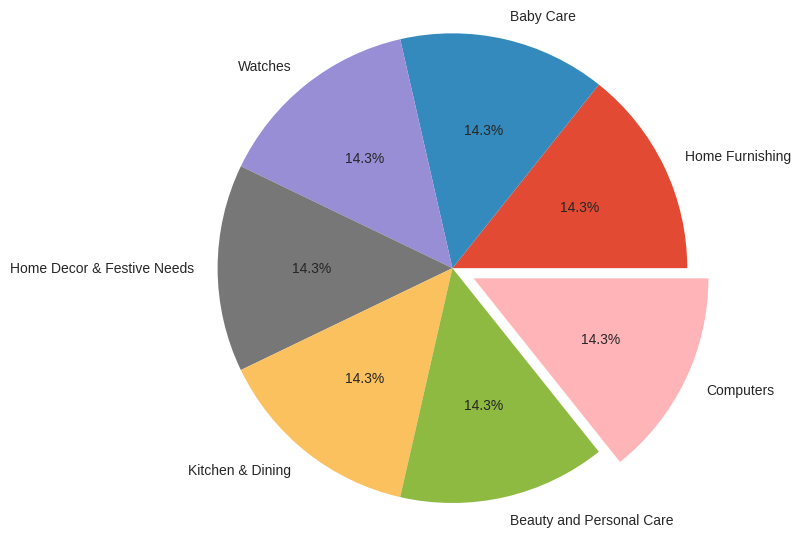

In [17]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

dic = { 'Home Furnishing':               150,
        'Baby Care':                     150,
        'Watches':                       150,
        'Home Decor & Festive Needs':    150,
        'Kitchen & Dining':              150,
        'Beauty and Personal Care':      150,
        'Computers':                     150,
      }

import itertools
newdic={}
for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<2) else k):
     newdic[key] = sum([dic[k] for k in list(group)])

labels = dic.keys()
sizes = dic.values()

fig, ax = plt.subplots()


ax.pie(sizes, labels=labels, autopct='%1.1f%%', explode=(0,0,0,0,0,0,0.1), startangle=0)
ax.axis('equal')
plt.tight_layout()

plt.show()

In [18]:
!pip install gensim==3.8.3
!pip install pyLDAvis

  Using cached gensim-3.8.3.tar.gz (23.4 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for gensim
  Running setup.py clean for gensim
Failed to build gensim
ERROR: Could not build wheels for gensim, which is required to install pyproject.toml-based projects


In [19]:
import nltk
from sklearn.decomposition import NMF, LatentDirichletAllocation
import json
import glob #work with multiple text, json and python

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy, lemmatisation
import spacy
nltk.download('stopwords')
from nltk.corpus import stopwords

# great for LDA models visualisation
#vis
import pyLDAvis
import pyLDAvis.gensim

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# Now you can use the 'stopwords' variable and its functionalities
stop_words = set(stopwords.words('english'))

In [21]:
# lemmatization function to treat the text
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags and token.is_alpha:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)


data['lemmatizer'] = lemmatization(data['description'])
print (data['lemmatizer'] [0][0:90])

cm price r curtain enhance look interior curtain make high quality polyester fabric featur


In [22]:
def gen_words(texts):
  final = []
  for text in texts:
    new = gensim.utils.simple_preprocess(text, deacc=True)
    final.append(new)
    return (final)

# data_words = gen_words(lemmatized_texts)
data_words = gen_words(data['lemmatizer'])

# print (lemmatized_texts[0][0:20])
print (data['lemmatizer'][0][0:20])

cm price r curtain e


In [23]:
w_tokenizer = nltk.RegexpTokenizer(r'[a-zA-Z]\w+\'?\w*')

data['tokenize'] = data.apply(lambda x : w_tokenizer.tokenize(x['lemmatizer']), axis = 1)
data['tokenize'].values[0]

['cm',
 'price',
 'curtain',
 'enhance',
 'look',
 'interior',
 'curtain',
 'make',
 'high',
 'quality',
 'polyester',
 'fabric',
 'feature',
 'eyelet',
 'style',
 'stitch',
 'make',
 'room',
 'environment',
 'romantic',
 'loving',
 'curtain',
 'wrinkle',
 'anti',
 'shrinkage',
 'elegant',
 'apparance',
 'give',
 'home',
 'bright',
 'modernistic',
 'appeal',
 'design',
 'surreal',
 'attention',
 'sure',
 'steal',
 'heart',
 'contemporary',
 'eyelet',
 'valance',
 'curtain',
 'slide',
 'smoothly',
 'so',
 'draw',
 'apart',
 'first',
 'thing',
 'morning',
 'welcome',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morning',
 'whole',
 'world',
 'draw',
 'close',
 'evening',
 'create',
 'most',
 'special',
 'moment',
 'joyous',
 'beauty',
 'give',
 'soothe',
 'print',
 'bring',
 'home',
 'elegant',
 'curtain',
 'softly',
 'filter',
 'light',
 'room',
 'get',
 'right',
 'amount',
 'sunlight',
 'cm',
 'design',
 'cm',
 'sale']

In [24]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

ps = PorterStemmer()
wordnet = WordNetLemmatizer()

def preprocess_stem(sentence):
        corpus = []
        for i in range(0, len(sentence)):
            review = re.sub('[^a-zA-Z]', ' ', sentence[i])
            review = review.lower()
            review = review.split()

            review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
            review = ' '.join(review)
            corpus.append(review)

        return corpus  # Return the processed reviews

data['stemmer'] = preprocess_stem(data['description'])
print (data['stemmer'] [0][0:20])

key featur eleg poly


In [25]:
w_tokenizer = nltk.RegexpTokenizer(r'[a-zA-Z]\w+\'?\w*')

data['tokenize_stem'] = data.apply(lambda x : w_tokenizer.tokenize(x['stemmer']), axis = 1)
data['tokenize_stem'].values[0]

['key',
 'featur',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'cm',
 'height',
 'pack',
 'price',
 'rs',
 'curtain',
 'enhanc',
 'look',
 'interior',
 'curtain',
 'made',
 'high',
 'qualiti',
 'polyest',
 'fabric',
 'featur',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environ',
 'romant',
 'love',
 'curtain',
 'ant',
 'wrinkl',
 'anti',
 'shrinkag',
 'eleg',
 'appar',
 'give',
 'home',
 'bright',
 'modernist',
 'appeal',
 'design',
 'surreal',
 'attent',
 'sure',
 'steal',
 'heart',
 'contemporari',
 'eyelet',
 'valanc',
 'curtain',
 'slide',
 'smoothli',
 'draw',
 'apart',
 'first',
 'thing',
 'morn',
 'welcom',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morn',
 'whole',
 'world',
 'draw',
 'close',
 'even',
 'creat',
 'special',
 'moment',
 'joyou',
 'beauti',
 'given',
 'sooth',
 'print',
 'bring',
 'h

In [26]:
text_total = []
for i in range(len(data['tokenize'])) :
  text_total += data['tokenize'].values[i]

In [27]:
from collections import Counter

print('Le nombre de mots de la colonne tokenize         ==>', len(text_total))
print('Le nombre de mots uniques de la colonne tokenize ==>', len(set(text_total)))

Le nombre de mots de la colonne tokenize         ==> 23733
Le nombre de mots uniques de la colonne tokenize ==> 2560


# LDA

In [28]:
# https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#9createbigramandtrigrammodels

#BIGRAMS AND TRIGRAMS
# bigram_phrases = gensim.models.Phrases(data_words, min_count=2, threshold=100)
bigram_phrases = gensim.models.Phrases(data['tokenize'], min_count=2, threshold=100)
# trigram_phrases = gensim.models.Phrases(bigram_phrases[data_words],  min_count=5, threshold=100)
trigram_phrases = gensim.models.Phrases(bigram_phrases[data['tokenize']],  min_count=5, threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

# data_bigrams = make_bigrams(data['tokenize'])
# data_bigrams_trigrams = make_trigrams(data_bigrams)

print(trigram[data['tokenize'][0]])
# print (data_bigrams_trigrams[data['lemmatizer'][0]])

['cm', 'price', 'curtain', 'enhance', 'look', 'interior', 'curtain', 'make', 'high', 'quality', 'polyester', 'fabric', 'feature', 'eyelet', 'style', 'stitch', 'make', 'room', 'environment', 'romantic', 'loving', 'curtain', 'wrinkle', 'anti', 'shrinkage', 'elegant', 'apparance', 'give', 'home', 'bright', 'modernistic', 'appeal', 'design', 'surreal', 'attention', 'sure', 'steal', 'heart', 'contemporary', 'eyelet', 'valance', 'curtain', 'slide', 'smoothly', 'so', 'draw', 'apart', 'first', 'thing', 'morning', 'welcome', 'bright', 'sun', 'ray', 'want', 'wish', 'good', 'morning', 'whole', 'world', 'draw', 'close', 'evening', 'create', 'most', 'special', 'moment', 'joyous', 'beauty', 'give', 'soothe', 'print', 'bring', 'home', 'elegant', 'curtain', 'softly', 'filter', 'light', 'room', 'get', 'right', 'amount', 'sunlight', 'cm', 'design', 'cm', 'sale']


In [29]:
def make_bigrams(texts):
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return ([trigram[bigram[doc]] for doc in texts])

In [30]:
data['bigram'] = make_bigrams(data['tokenize'])
data['bigram_trigram'] = make_trigrams(data['bigram'])

In [31]:
# Créez un objet de corpora.Dictionary()
id2word = corpora.Dictionary(data['bigram'])

text = data['bigram']

# l'id du mot et sa fréquence dans chaque document
corpus = [id2word.doc2bow(text) for text in text]

print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 3), (10, 1), (11, 1), (12, 5), (13, 2), (14, 2), (15, 2), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 2), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 2), (36, 1), (37, 1), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1)]


In [32]:
# #Apply Countvectorizer
# # Creating the Bag of Words model
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(max_features = 1500)
# X = cv.fit_transform(id2word).toarray()


# # convert to categorical values
# # y=pd.get_dummies(data['cat_lvl_1'])
# # y=y.iloc[:,1].values
# y=np.where(np.array(pd.get_dummies(data['cat_lvl_1']))==1)[1]


# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [33]:
len(id2word)

2709

In [34]:
#improving the lda model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7,
                                           random_state=9,
                                           update_every=2,
                                           chunksize=49,
                                           passes=10,
                                           alpha="auto",
                                           per_word_topics=True
                                            )

In [35]:
len(id2word)

2709

In [36]:
# Print the Keyword in the 7 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.203*"only" + 0.085*"free" + 0.083*"buy" + 0.081*"shipping" + 0.062*"price" + 0.058*"good" + 0.051*"online" + 0.049*"delivery" + 0.048*"cash" + 0.032*"cm"'), (1, '0.030*"colour" + 0.025*"size" + 0.025*"make" + 0.024*"laptop" + 0.021*"quality" + 0.019*"type" + 0.018*"high" + 0.014*"compatible" + 0.012*"require" + 0.012*"also"'), (2, '0.080*"cm" + 0.058*"inch" + 0.024*"specification" + 0.018*"pad" + 0.017*"use" + 0.015*"make" + 0.014*"color" + 0.014*"price" + 0.012*"size" + 0.011*"home"'), (3, '0.059*"skin" + 0.029*"product" + 0.020*"use" + 0.017*"price" + 0.016*"range" + 0.016*"wash" + 0.014*"make" + 0.013*"soft" + 0.012*"lead" + 0.012*"keep"'), (4, '0.028*"number" + 0.026*"specification" + 0.023*"sleeve" + 0.021*"usb" + 0.020*"adapter" + 0.019*"quality" + 0.018*"cover" + 0.018*"battery" + 0.017*"laptop" + 0.015*"product"'), (5, '0.036*"mug" + 0.036*"perfect" + 0.029*"design" + 0.028*"product" + 0.025*"gift" + 0.023*"make" + 0.021*"mm" + 0.021*"cover" + 0.020*"love" + 0.020*"coff

In [37]:
lda_model.save("./test_model.model")

In [38]:
new_model = gensim.models.ldamodel.LdaModel.load("./test_model.model")

# Vizualizing the Data

In [39]:
pyLDAvis.enable_notebook()
import warnings

# Filter FutureWarning and RuntimeWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Your code that generates the warnings here
pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

# Reset the warning filters (optional)
warnings.resetwarnings()

In [40]:
import warnings

# Filter out import-related warnings
warnings.filterwarnings("ignore", category=ImportWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.016691  0.116629       1        1  19.224163
5      0.124589  0.085331       2        1  17.544108
0     -0.385197 -0.008018       3        1  16.388800
3      0.070392  0.127065       4        1  14.693330
4      0.063519 -0.161340       5        1  12.358174
6      0.074268  0.110047       6        1  10.748676
1      0.069120 -0.269715       7        1   9.042749, topic_info=         Term        Freq       Total Category  logprob  loglift
131      only  720.000000  720.000000  Default  30.0000  30.0000
427      free  303.000000  303.000000  Default  29.0000  29.0000
201       buy  294.000000  294.000000  Default  28.0000  28.0000
138  shipping  288.000000  288.000000  Default  27.0000  27.0000
9          cm  466.000000  466.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
396      also   23.225241   89.432382   Topic7  -4.4342   1.0550
42      print   15.544209   55.314791   Topic7  -4.8357   1.1339
187     other   15.371743   57.223118   Topic7  -4.8469   1.0888
41      price   18.360949  456.000815   Topic7  -4.6692  -0.8091
196      well   12.362229   22.127733   Topic7  -5.0648   1.8210

[351 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1959      7  0.951038   absorbent
1257      5  0.984831     adapter
142       1  0.170199         add
142       2  0.816957         add
454       6  0.906755  additional
...     ...       ...         ...
1197      3  0.959317       woman
498       4  0.965440        wood
69        6  0.928061       world
111       2  0.959208        year
111       4  0.025925        year

[392 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 6, 1, 4, 5, 7, 2])

In [41]:
# identifier le numéro de topic pour chaque document
import warnings

# Suppress the DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

def get_max(doc):
        idx,l = zip(*doc)
        return idx[np.argmax(l)]

# Affecter les clusters
cluster=[]
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=DeprecationWarning)
    for i in range(len(corpus)):
      x_topic = lda_model.get_document_topics( corpus[i] , minimum_probability = 0.0001 , minimum_phi_value = None , per_word_topics = False )
      cluster.append(get_max(x_topic))

In [42]:
# Suppress the DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

y=np.where(np.array(pd.get_dummies(data['cat_lvl_1']))==1)[1]

In [43]:
# Suppress the DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

x_topic

[(0, 0.9438281),
 (1, 0.006405728),
 (2, 0.014233644),
 (3, 0.010492281),
 (4, 0.007310615),
 (5, 0.007874267),
 (6, 0.009855402)]

In [44]:
data['Cluster'] = cluster
data['Cluster'].value_counts()

Cluster
0    578
2    157
4     90
6     68
5     61
3     51
1     45
Name: count, dtype: int64

In [45]:
data['Cluster_cat'].value_counts().sum()

1050

# ARI score

In [46]:
import warnings
from sklearn.metrics.cluster import adjusted_rand_score

# Define a custom filter
class IgnoreSpecificWarning(UserWarning):
    pass

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=IgnoreSpecificWarning)
    print('ARI score : ', adjusted_rand_score(data['Cluster'], data['Cluster_cat']))

ARI score :  0.051822133596556505


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

# TF-IDF

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

warnings.filterwarnings("ignore", category=FutureWarning)

tfidf = TfidfVectorizer()
# tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['lemmatizer'])

print(X)

  (0, 1950)	0.06439955056513444
  (0, 2229)	0.10408032305325084
  (0, 71)	0.10408032305325084
  (0, 1914)	0.08070480129047411
  (0, 981)	0.061694718324022485
  (0, 1290)	0.07775857599823773
  (0, 870)	0.10408032305325084
  (0, 2108)	0.11023306346702208
  (0, 272)	0.06439955056513444
  (0, 1749)	0.0659572785907935
  (0, 2118)	0.09971488425692572
  (0, 197)	0.08740940342938323
  (0, 1214)	0.11023306346702208
  (0, 1442)	0.08919670504682936
  (0, 2133)	0.07529242844194282
  (0, 1451)	0.08581060765203918
  (0, 537)	0.08581060765203918
  (0, 780)	0.10408032305325084
  (0, 398)	0.11023306346702208
  (0, 2527)	0.08919670504682936
  (0, 2503)	0.09122298050057047
  (0, 1007)	0.03876817975682955
  (0, 2515)	0.09971488425692572
  (0, 2470)	0.09122298050057047
  (0, 1819)	0.11023306346702208
  :	:
  (1047, 606)	0.12304069387243309
  (1047, 328)	0.12352762799136292
  (1047, 931)	0.09653931574865786
  (1047, 294)	0.10032414196140212
  (1047, 2029)	0.09653931574865786
  (1047, 1544)	0.114869131974112

In [48]:
# calculer le nombre de mots

def word_count(sent):
    word2cnt = dict()
    for word in sent.split():
        if word in word2cnt: word2cnt[word] += 1
        else: word2cnt[word] = 1
    return word2cnt

In [49]:
data['lemmatizer'].apply(word_count)

0       {'cm': 3, 'price': 1, 'r': 1, 'curtain': 5, 'e...
1       {'specification': 1, 'feature': 1, 'cotton': 1...
2       {'small': 2, 'inch': 3, 'piece': 3, 'price': 1...
3       {'feature': 1, 'santosh': 3, 'size': 2, 'speci...
4       {'feature': 1, 'size': 3, 'cotton': 2, 'bed': ...
                              ...                        
1045    {'extra': 1, 'large': 1, 'price': 1, 'r': 1, '...
1046    {'price': 1, 'bring': 2, 'home': 6, 'exclusive...
1047    {'buy': 1, 'extra': 2, 'large': 2, 'import': 2...
1048    {'online': 1, 'good': 1, 'price': 1, 'free': 1...
1049    {'buy': 1, 'good': 1, 'price': 1, 'free': 1, '...
Name: lemmatizer, Length: 1050, dtype: object

In [50]:
len(tfidf.vocabulary_)

2548

In [51]:
tfidf.vocabulary_

{'cm': 404,
 'price': 1743,
 'curtain': 560,
 'enhance': 750,
 'look': 1321,
 'interior': 1187,
 'make': 1356,
 'high': 1088,
 'quality': 1793,
 'polyester': 1697,
 'fabric': 822,
 'feature': 850,
 'eyelet': 821,
 'style': 2208,
 'stitch': 2175,
 'room': 1927,
 'environment': 767,
 'romantic': 1925,
 'loving': 1336,
 'wrinkle': 2532,
 'anti': 85,
 'shrinkage': 2041,
 'elegant': 725,
 'apparance': 94,
 'give': 989,
 'home': 1097,
 'bright': 267,
 'modernistic': 1435,
 'appeal': 95,
 'design': 618,
 'surreal': 2246,
 'attention': 139,
 'sure': 2240,
 'steal': 2164,
 'heart': 1074,
 'contemporary': 483,
 'valance': 2416,
 'slide': 2073,
 'smoothly': 2090,
 'so': 2097,
 'draw': 679,
 'apart': 93,
 'first': 882,
 'thing': 2311,
 'morning': 1449,
 'welcome': 2497,
 'sun': 2225,
 'ray': 1819,
 'want': 2470,
 'wish': 2515,
 'good': 1007,
 'whole': 2503,
 'world': 2527,
 'close': 398,
 'evening': 780,
 'create': 537,
 'most': 1451,
 'special': 2133,
 'moment': 1442,
 'joyous': 1214,
 'beauty': 

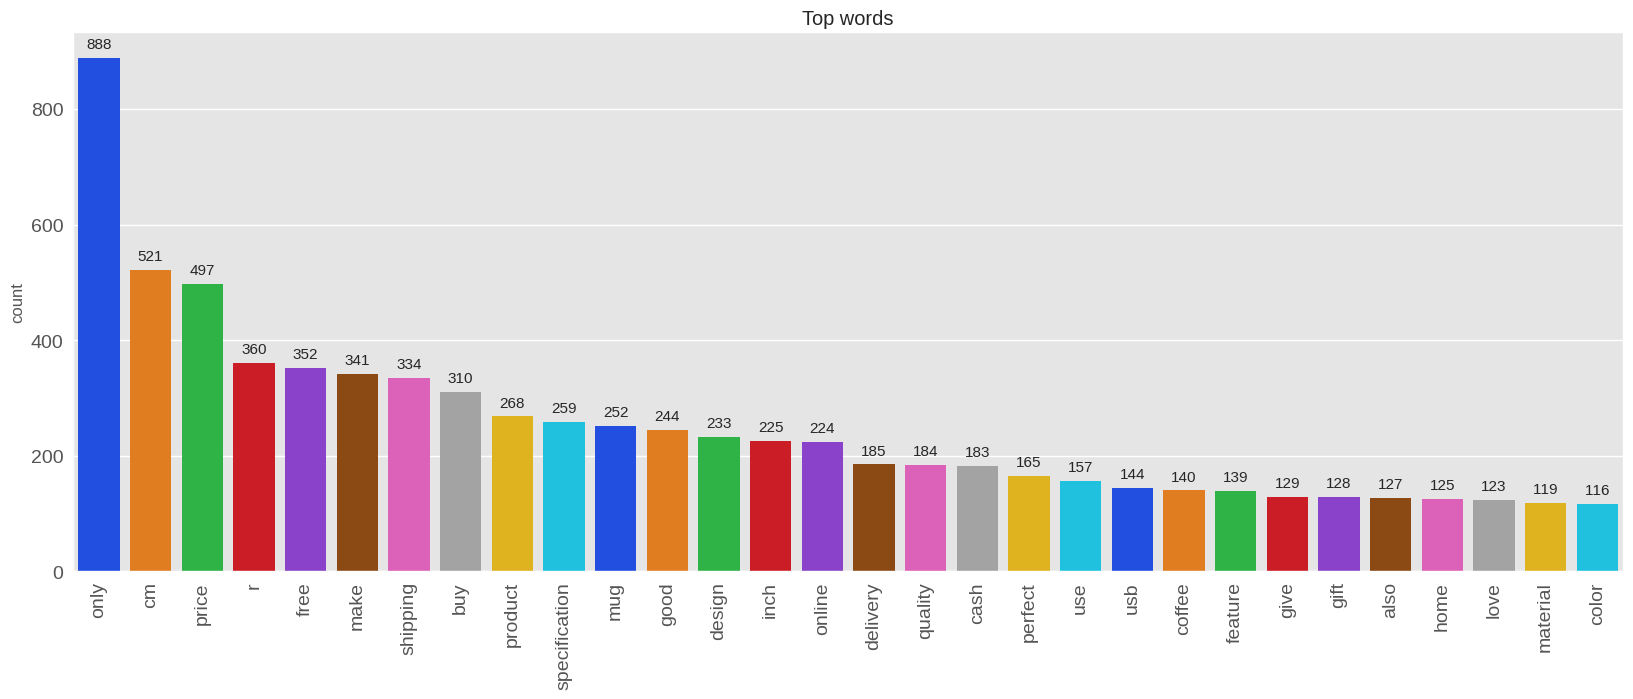

In [52]:
warnings.filterwarnings("ignore", category=FutureWarning)

data['group'] = 1
df = data.groupby(['group'])['lemmatizer'].transform(lambda x : ' '.join(x))[0]
text_total = word_count(df)
word_items = text_total.items()
df_word_repeat = pd.DataFrame(word_items,columns = ['word','count']).sort_values(by='count', ascending = False)
df_word_repeat

fig, ax = plt.subplots(figsize=(20,7))
sns.barplot(x='word', y='count', data=df_word_repeat.head(30), ax=ax, palette='bright')

plt.title('Top words')
plt.xticks(rotation='vertical')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('', fontsize=14)

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate("%.0f" % p.get_height(),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize = 11,
                #  rotation='vertical',
                )

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:35: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/wordcloud/stopwords' mode='r' encoding='UTF-8'>
  STOPWORDS = set(map(str.strip, open(os.path.join(FILE, 'stopwords')).readlines()))


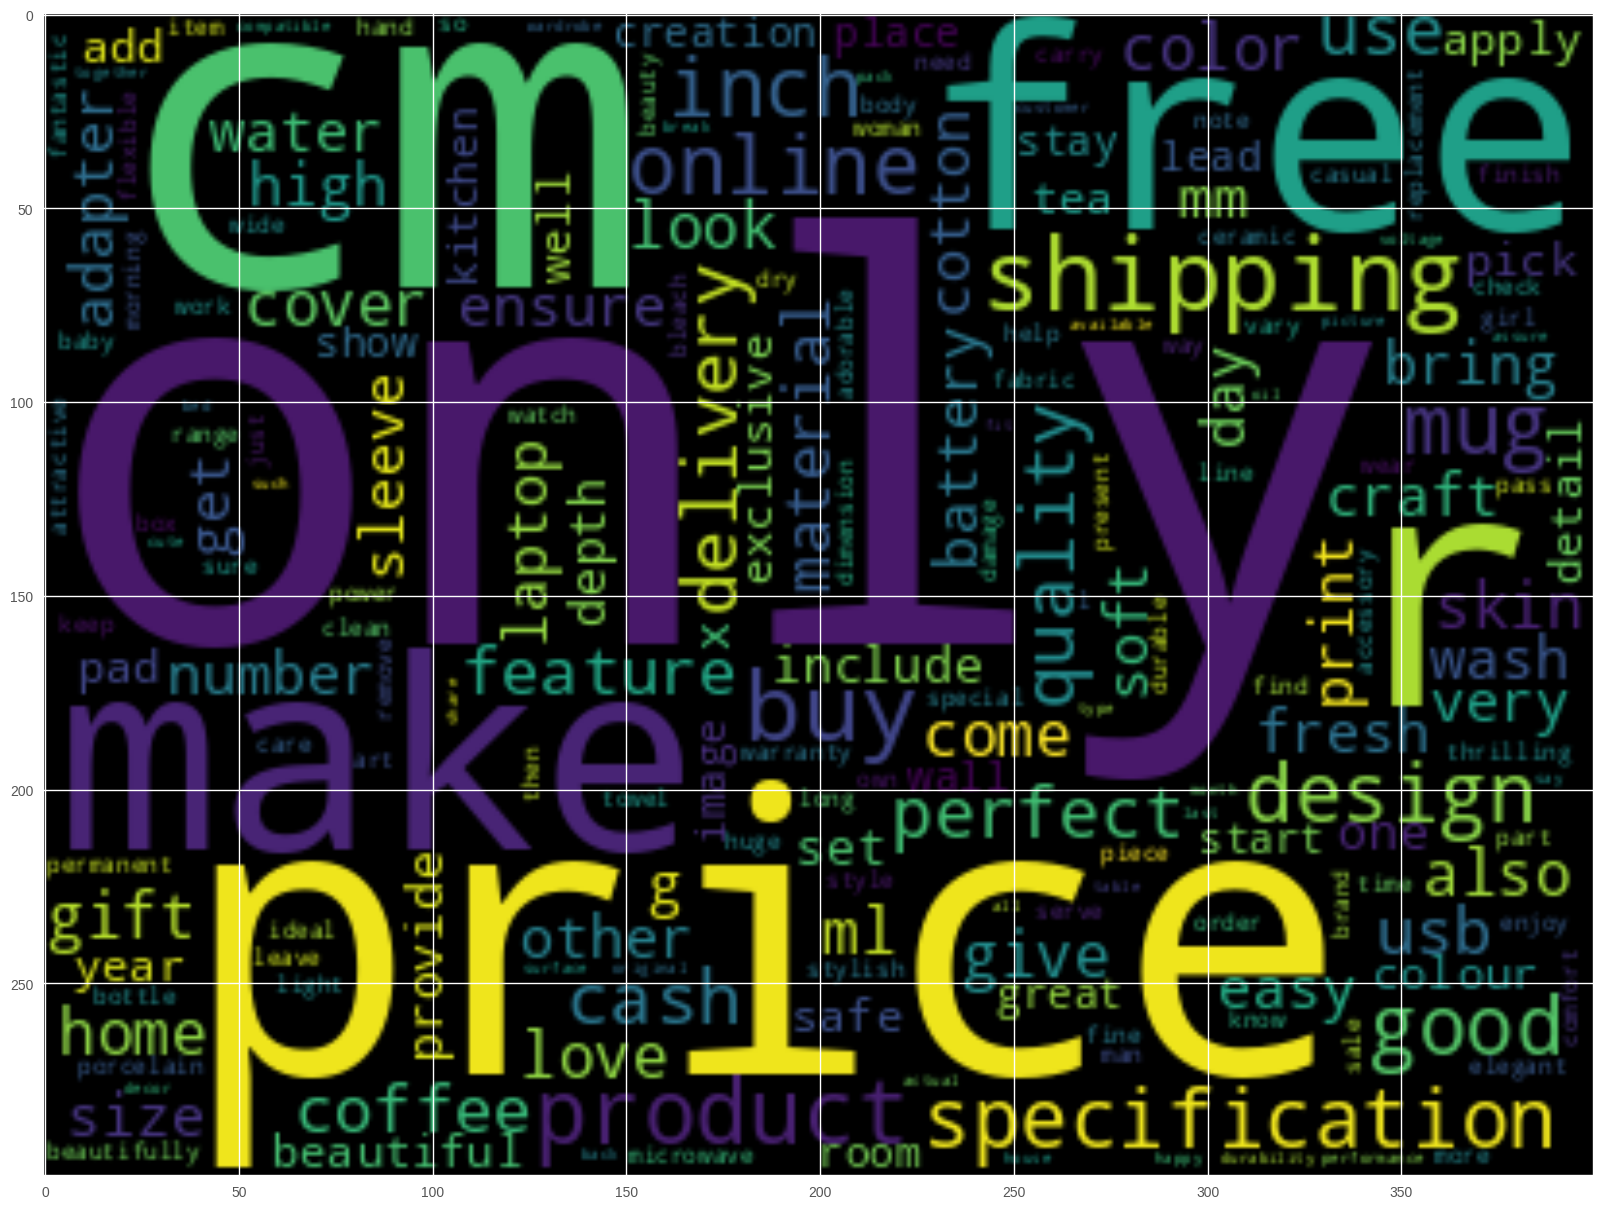

In [53]:
### Creating wordcloud
from wordcloud import WordCloud
import wordcloud

warnings.filterwarnings("ignore", category=FutureWarning)

# creation of wordcloud
wcloud_fig = WordCloud(stopwords=set(wordcloud.STOPWORDS),
                      colormap='viridis', width=400, height=300).generate_from_frequencies(text_total)

# plotting the wordcloud
plt.figure(figsize=(20,20), frameon=True)

plt.imshow(wcloud_fig, interpolation  = 'bilinear')
plt.show()

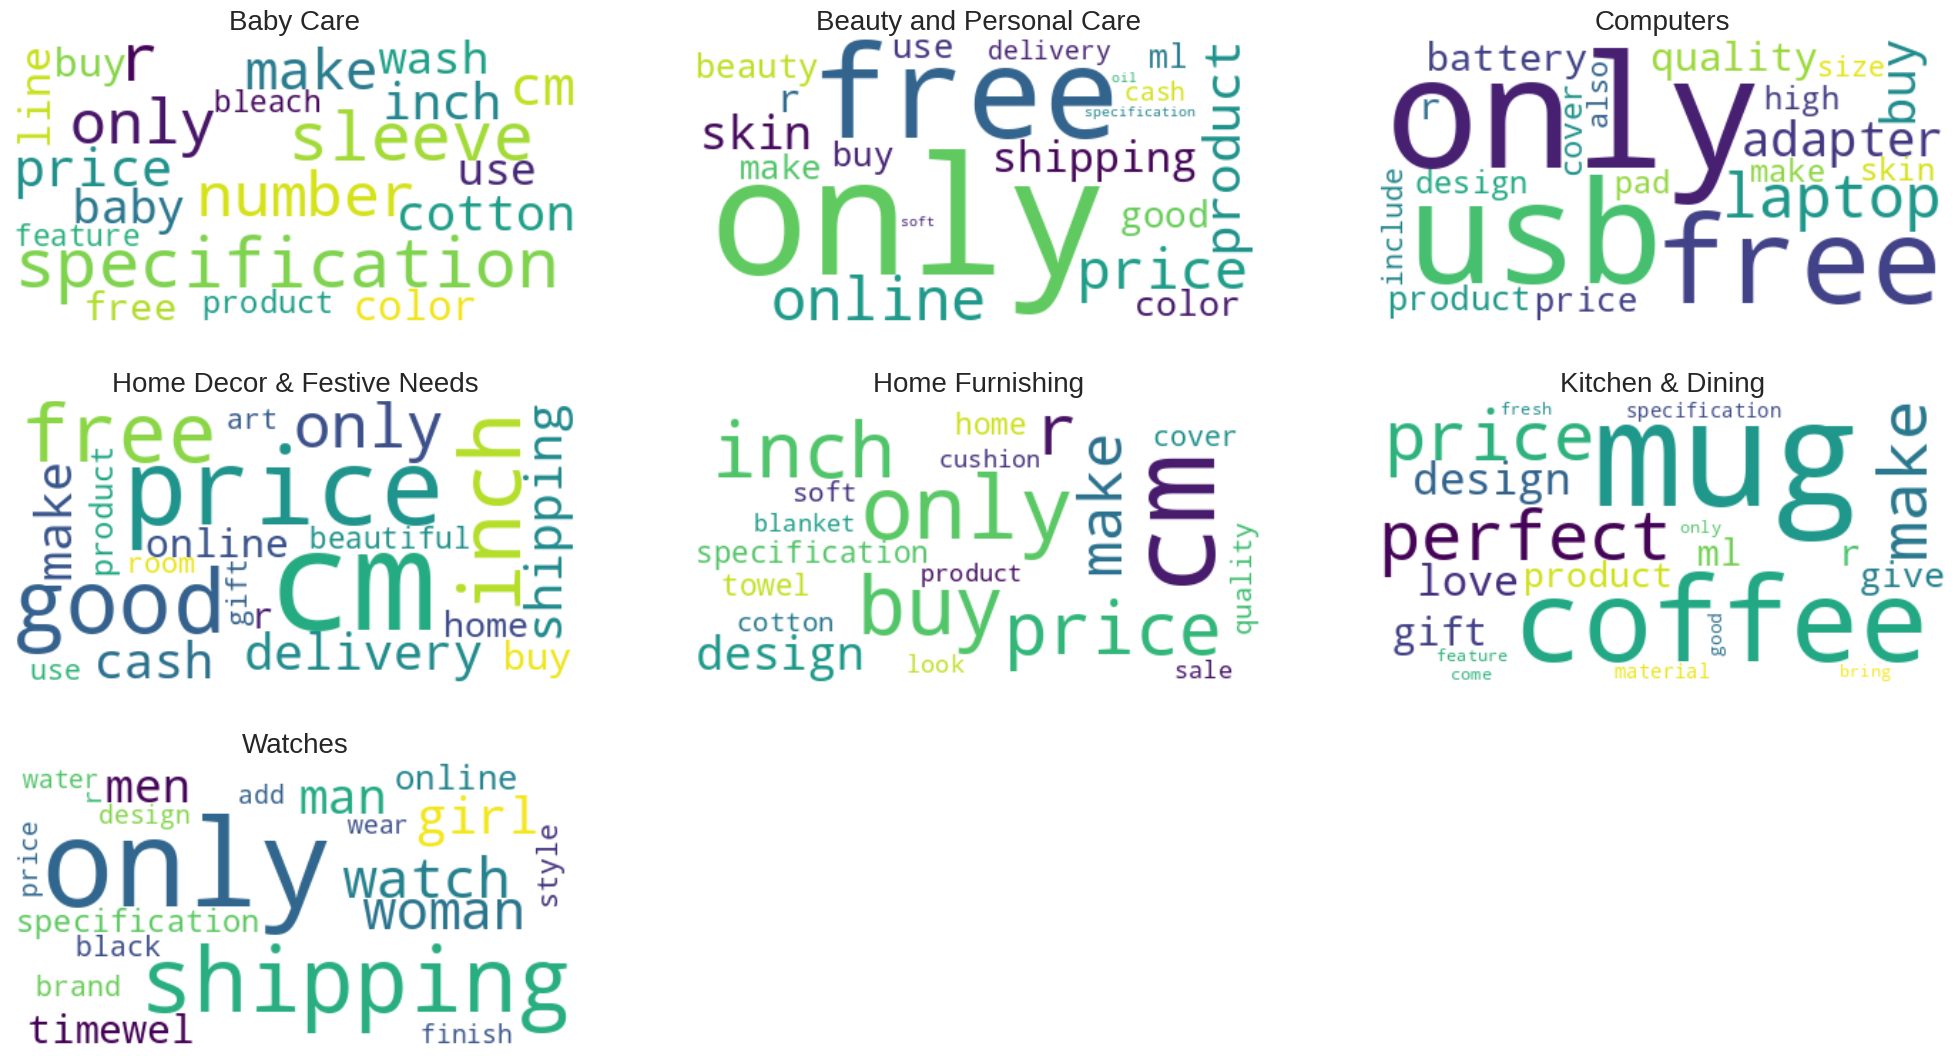

In [54]:
warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(3, figsize=(25,18))
plt.style.use('fast')
for i in range(len(data['Cluster_cat'].unique())) :
  df = data[data['Cluster_cat']==i].groupby(['Cluster_cat'])['lemmatizer'].transform(lambda x : ' '.join(x))[0:1].tolist()[0]
  text_total_cat = word_count(df)
  ### Creating wordcloud
  from wordcloud import WordCloud
  import wordcloud
  # creation of wordcloud
  wcloud_fig = WordCloud(stopwords=set(wordcloud.STOPWORDS),
                        colormap='viridis', max_words=20, background_color="white").generate_from_frequencies(text_total_cat)

  # plotting the wordcloud
  ax = plt.subplot(4, 3, i+1)
  # plt.text(100,-10,df_category[['main_category']][df_category['Cluster_cat']==i].values[0][0],fontsize=18)
  # plt.set_title("The Title")
  plt.title(data[['cat_lvl_1']][data['Cluster_cat']==i].values[0][0],fontsize=20)
  plt.imshow(wcloud_fig, interpolation  = 'bilinear')
  # plt.axis('off')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [55]:
warnings.filterwarnings("ignore", category=FutureWarning)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [56]:
# Le nombre de mot par ligne
import plotly.express as px
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=DeprecationWarning)
    data['word_length'] = data['lemmatizer'].apply(lambda x:len(x.split()))

    Data_word_length = data.groupby(['cat_lvl_1']).agg({"word_length" : "sum"}).reset_index()

    fig = px.bar(Data_word_length, y='cat_lvl_1', x='word_length', text_auto='.3s', color = 'cat_lvl_1',
                title="Le nombre de mots par catégorie")
    fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

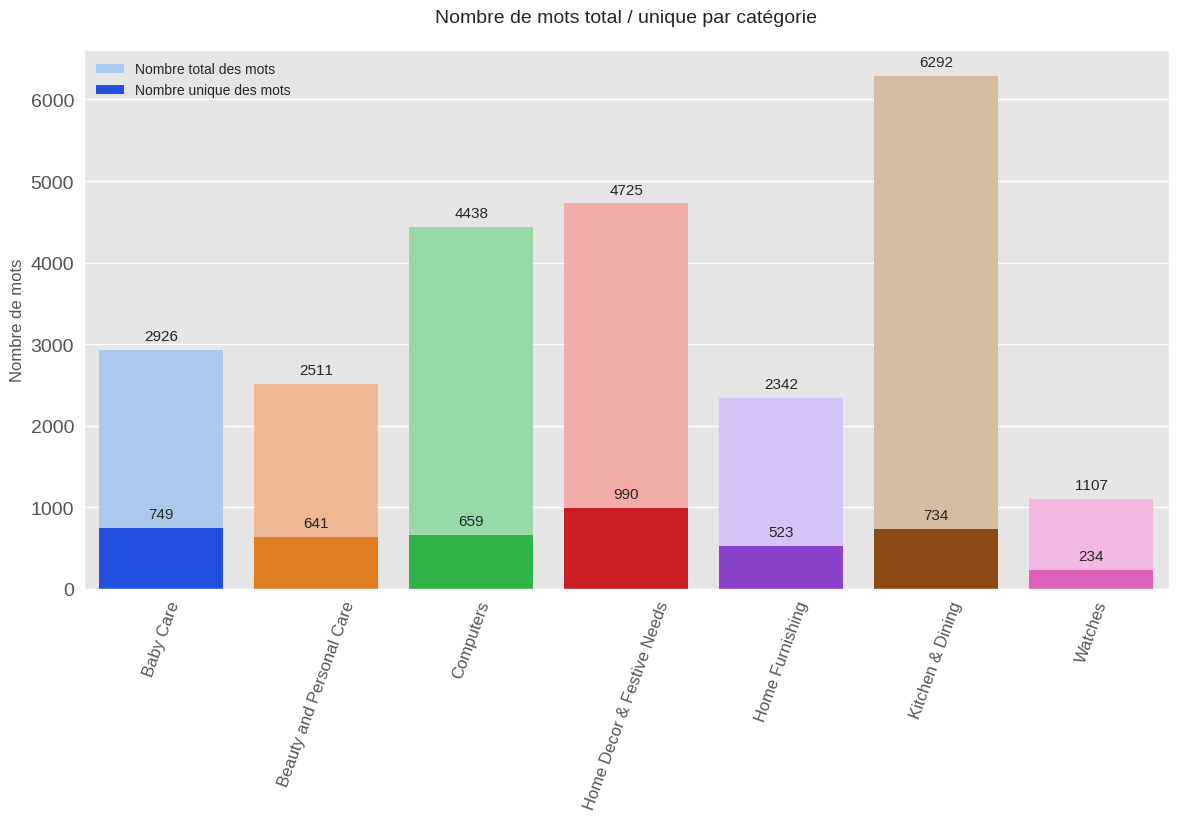

In [57]:
#Le nombre de mots unique par catégorie
# grouper par catégorie et concaténer les desciptions de la colonne 'lemmatizer'

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=DeprecationWarning)
    df = data.groupby('cat_lvl_1')['lemmatizer'].apply(lambda x: "%s" % ' '.join(x))

    df = pd.DataFrame(df, columns=['lemmatizer'])
    df['nb_word_unique'] = df['lemmatizer'].apply(lambda x:len(np.unique(x.split())))
    df = pd.merge(df, Data_word_length, on='cat_lvl_1', how='right')

    x = df['cat_lvl_1']
    y = df['word_length']
    y_bis = df['nb_word_unique']

    fig, ax = plt.subplots(figsize=(14,7))

    sns.barplot(x=x, y=y, data=df, color='blue',label = 'Nombre total des mots', palette='pastel')
    sns.barplot(x=x, y=y_bis, data=df, color='red', label = 'Nombre unique des mots', palette='bright')

    # Ajouter les annotations sur les barres
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        plt.annotate("%.0f" % p.get_height(),
                    (p.get_x()+p.get_width()/2, p.get_height()),
                    ha='center',
                    va='center',
                    xytext=(0, 10),
                    textcoords='offset points',
                    fontsize = 11,
                    #  rotation='vertical',
                    )

    ax.set_ylabel('Nombre de mots', fontsize=12)

    plt.xticks(rotation=70, fontsize=12)
    plt.yticks(fontsize=14)
    plt.xlabel('', fontsize=14)

    plt.title('Nombre de mots total / unique par catégorie\n', fontsize=14)
    plt.legend()

plt.show()

In [58]:
#Le nombre maximum de mots dans une description

warnings.filterwarnings("ignore", category=FutureWarning)

data['word_length'].max()

282

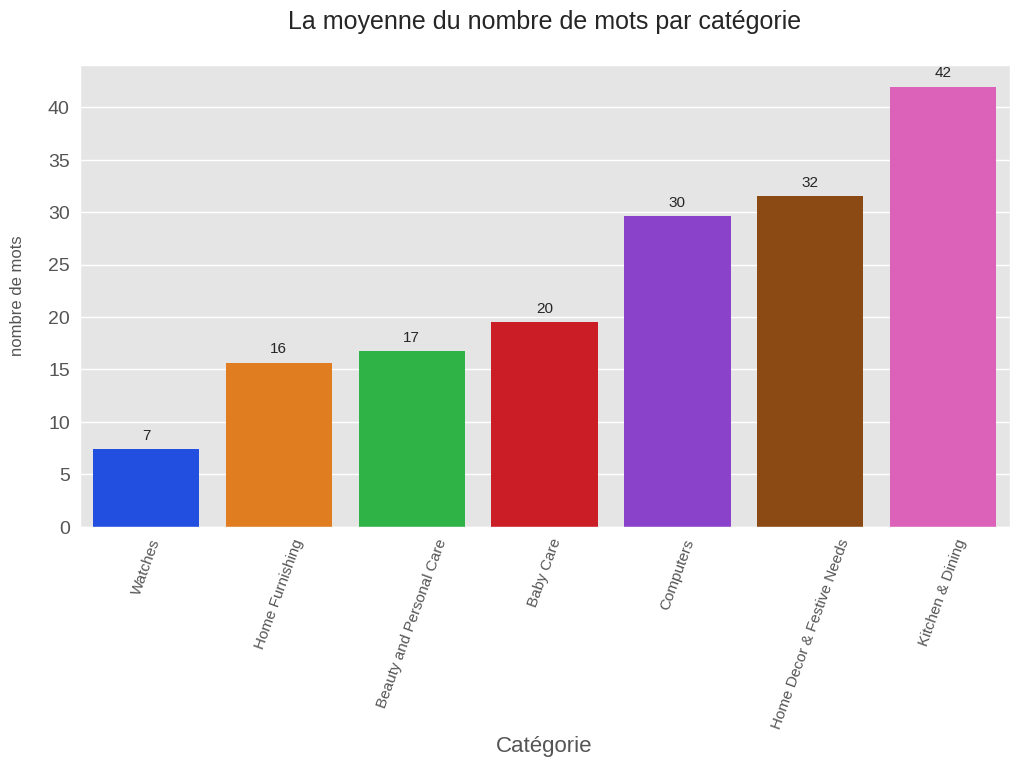

In [59]:
#La moyenne du nombre de mots par catégorie

warnings.filterwarnings("ignore", category=FutureWarning)

data_mean_word = data.copy()

data_mean_word = data_mean_word.groupby(['cat_lvl_1']).agg({"word_length" : "mean"}).reset_index()
data_mean_word = data_mean_word.sort_values(by='word_length', ascending=True)

x_frequency = data_mean_word['cat_lvl_1']
y_frequency = data_mean_word['word_length']

fig, ax = plt.subplots(figsize=(12,6))

# ax = sns.lineplot(x= x_frequency, y = y_frequency, data=data_mean_word, palette="pastel",marker='o')
ax = sns.barplot(x=x_frequency, y=y_frequency, data=data_mean_word, palette="bright")

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate("%.0f" % p.get_height(),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize = 11,
                #  rotation='vertical',
                )

ax.set_ylabel('nombre de mots\n', fontsize=12)

plt.xticks(rotation=70, fontsize=11)
plt.yticks(fontsize=14)
plt.xlabel('Catégorie', fontsize=16)

plt.title('La moyenne du nombre de mots par catégorie\n', fontsize=18)

plt.show()

In [60]:
warnings.filterwarnings("ignore", category=FutureWarning)

#Créer dataframe tfidf
df_tfidf = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())
df_tfidf.head()

,ability,able,abode,about,above,abrasion,abroad,absolute,absorb,absorbency,...,yellow,yet,yiboo,yield,young,youth,youthful,yrs,zipexterior,zippered
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.41973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.141401,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.manifold import TSNE
X = df_tfidf.values

X_tsne = TSNE(n_components=2).fit_transform(X)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7ee70630d480>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


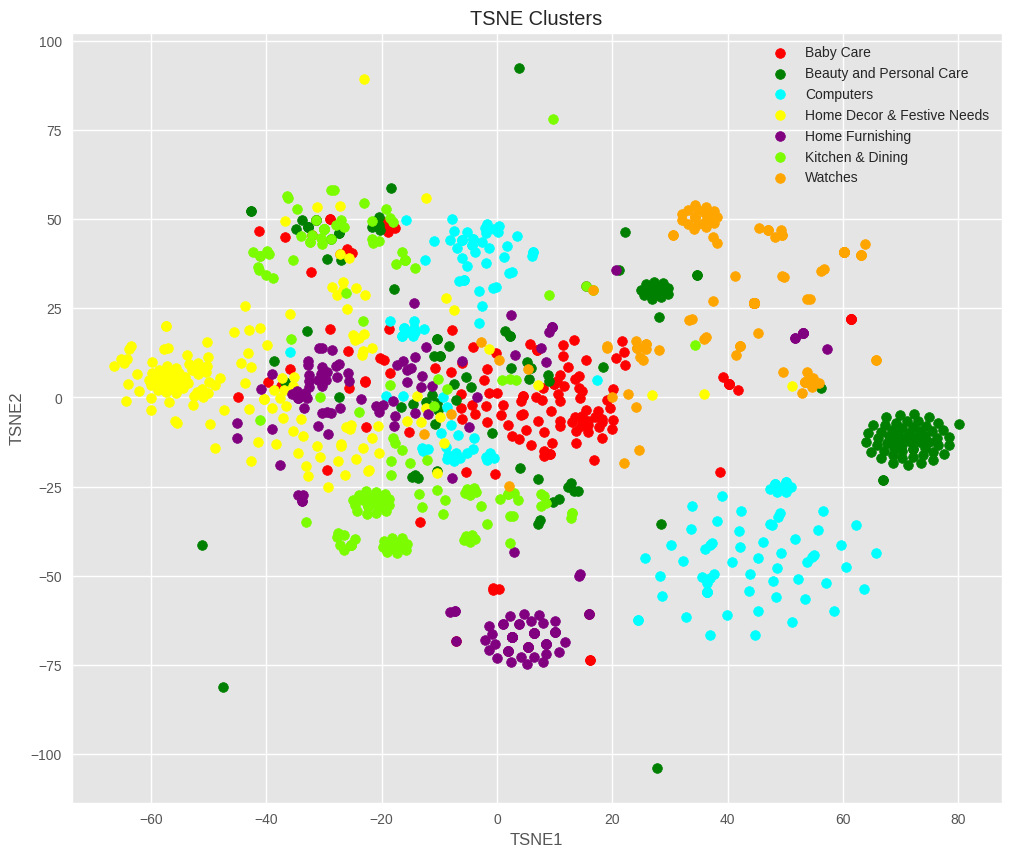

In [62]:
warnings.filterwarnings("ignore", category=FutureWarning)

bfig = plt.figure(figsize=(12, 10))

Colors = ["red", "green", "aqua", 'yellow', 'purple', 'lawngreen', 'orange']

target_name = []
j = []
for i in range(data['Cluster_cat'].unique().size):
    subset = data['cat_lvl_1'][data['Cluster_cat'] == i].unique()
    if len(subset) > 0:
        target_name.append(subset[0])
        j.append(i)

data['Color'] = data['Cluster_cat'].map(lambda p: Colors[p])

for color, i, target_name in zip(Colors, j, target_name):
    subset_indices = data['Cluster_cat'] == i
    plt.scatter(x=X_tsne[subset_indices, 0], y=X_tsne[subset_indices, 1], color=color, label=target_name)

plt.legend()
# plt.grid()

plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title('TSNE Clusters')

plt.show()

## Segmentation K-Means - TF-IDF (Lémmatisation)

In [63]:
warnings.filterwarnings("ignore", category=FutureWarning)

tfidf = TfidfVectorizer()

X = tfidf.fit_transform(data['lemmatizer'])

In [64]:
df_tfidf = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())
df_tfidf

,ability,able,abode,about,above,abrasion,abroad,absolute,absorb,absorbency,...,yellow,yet,yiboo,yield,young,youth,youthful,yrs,zipexterior,zippered
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.41973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.141401,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Graphique pour identifier le nombre de clusters

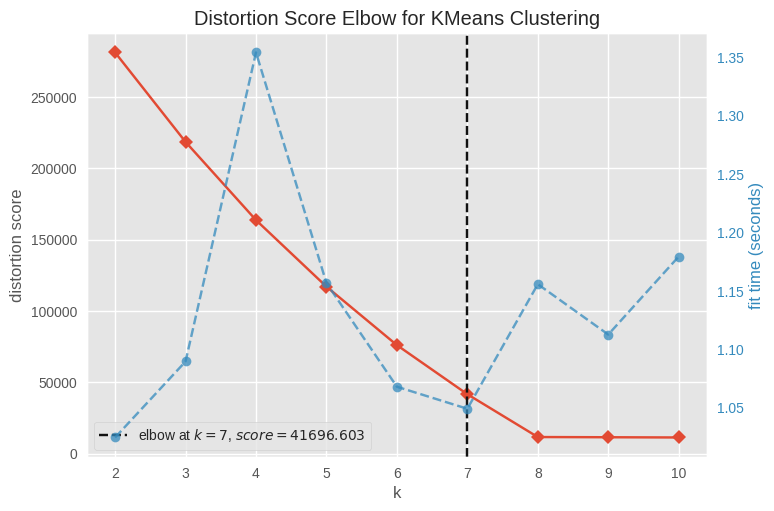

In [65]:
warnings.filterwarnings("ignore", category=FutureWarning)

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=0)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # Instantiate the clustering model and visualizer
    visualizer = KElbowVisualizer(KMeans(),K=(4,12))

    visualizer.fit(X)        # Fit the data to the visualizer
    visualizer.show();        # Finalize and render the figure


Initialiser TSNE

In [66]:
warnings.filterwarnings("ignore", category=FutureWarning)

X = df_tfidf.values

X_tsne = TSNE(n_components=2,random_state=9).fit_transform(X)

In [67]:
warnings.filterwarnings("ignore", category=FutureWarning)

# X = df_tfidf.values
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=9, n_init=10)
kmeans.fit_transform(X_tsne)

array([[ 70.19316 ,  31.443064,  77.79325 , ...,  47.312786,  26.466688,
         86.35126 ],
       [ 83.431206,  25.335442,  66.32425 , ...,  29.659344,  39.45903 ,
         86.8799  ],
       [ 78.26248 ,  22.087496,  65.49515 , ...,  34.480766,  34.352974,
         82.867546],
       ...,
       [110.99664 ,  49.471203,  78.31307 , ...,  13.596455,  66.81738 ,
        110.898605],
       [112.863144,  48.154713,  72.76015 , ...,   6.349668,  69.02187 ,
        108.489395],
       [122.55362 ,  54.935028,  70.93433 , ...,  10.7542  ,  79.35549 ,
        112.457634]], dtype=float32)

In [68]:
# La distance entre les clusters

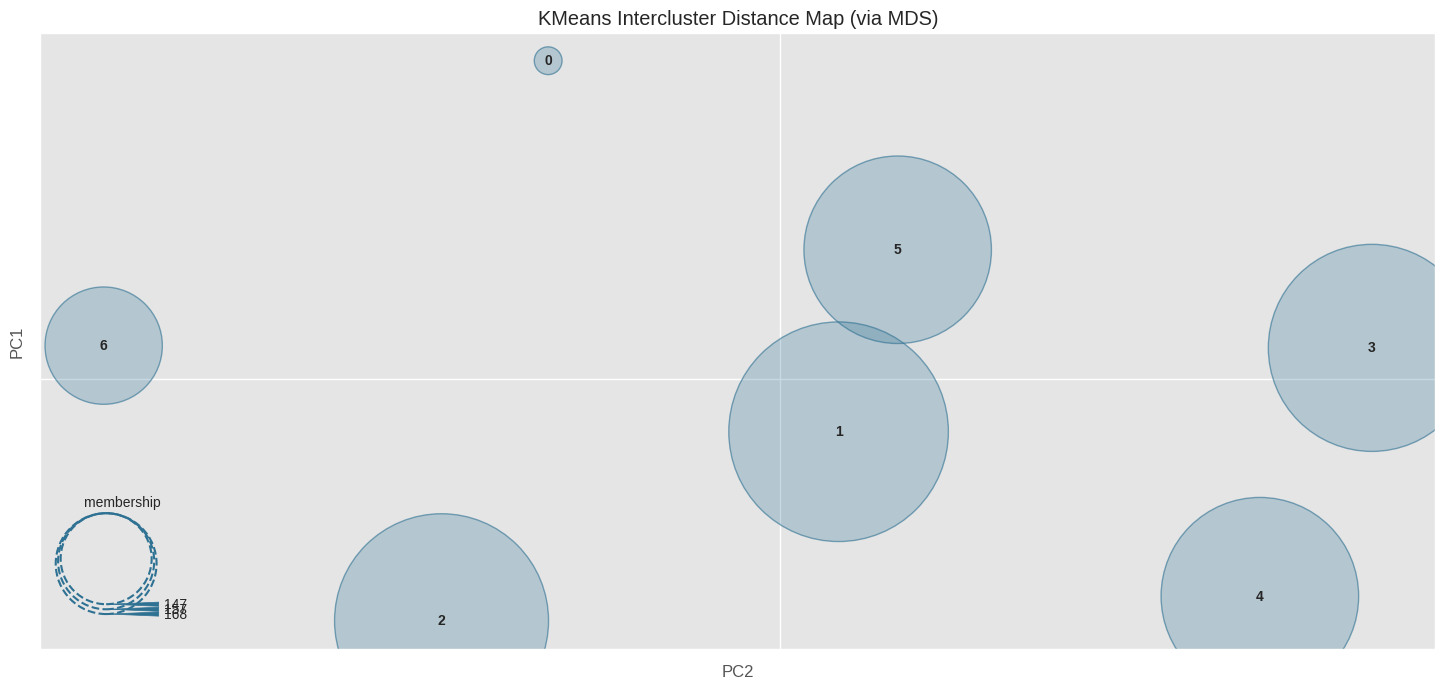

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [69]:
warnings.filterwarnings("ignore", category=FutureWarning)

fig = plt.figure(figsize=(18,8))

K = visualizer.elbow_value_
distance_visualizer = InterclusterDistance(kmeans)
distance_visualizer.fit(X_tsne)
distance_visualizer.show()

Trouver les clusters dans l'ensemble des données

In [70]:
warnings.filterwarnings("ignore", category=FutureWarning)

data['Cluster'] = kmeans.labels_

Projection des données

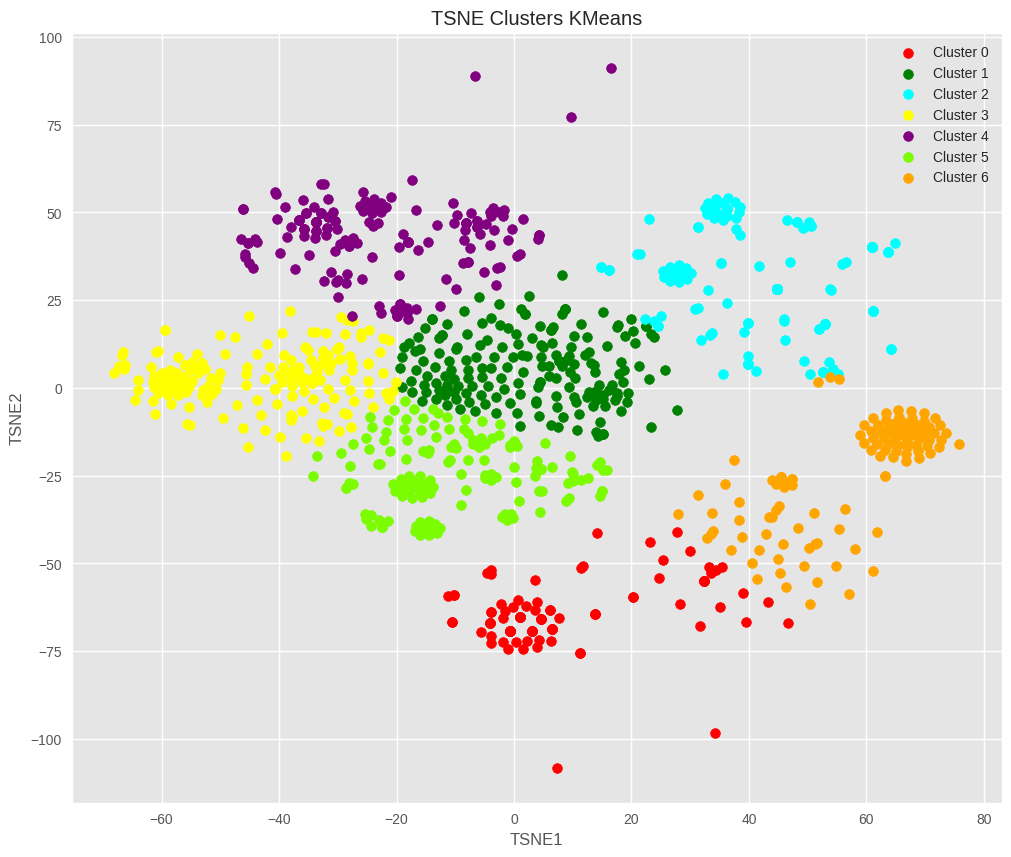

In [71]:
fig = plt.figure(figsize=(12,10))

Colors = ["red", "green", "aqua", 'yellow', 'purple', 'lawngreen', 'orange']

target_name = []
j=[]
for i in range(data['Cluster_cat'].unique().size):
  target_name.append('Cluster %i'%i)
  j.append(i)

data['Color'] = data['Cluster_cat'].map(lambda p: Colors[p])

for color, i, target_name in zip(Colors, j, target_name):
  plt.scatter(x = X_tsne[data['Cluster']==i,0], y = X_tsne[data['Cluster']==i,1], color=Colors[i], label=target_name)


plt.legend()

plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title('TSNE Clusters KMeans')



plt.show()

In [72]:
warnings.filterwarnings("ignore", category=FutureWarning)

print('ARI score suite à la lémmatisation : ',adjusted_rand_score(data['Cluster'], data['Cluster_cat']))

ARI score suite à la lémmatisation :  0.3039047639152254


# DistilBert

In [73]:
warnings.filterwarnings("ignore", category=FutureWarning)

!pip install transformers

In [74]:
warnings.filterwarnings("ignore", category=FutureWarning)

from transformers import DistilBertTokenizerFast
from transformers import TFDistilBertForSequenceClassification
from transformers import TextClassificationPipeline

import tensorflow as tf

In [75]:
warnings.filterwarnings("ignore", category=FutureWarning)

df = pd.DataFrame()

In [76]:
warnings.filterwarnings("ignore", category=FutureWarning)

df['count'] = data['description'].apply(lambda x: len(x.split()))

<Figure size 800x800 with 0 Axes>

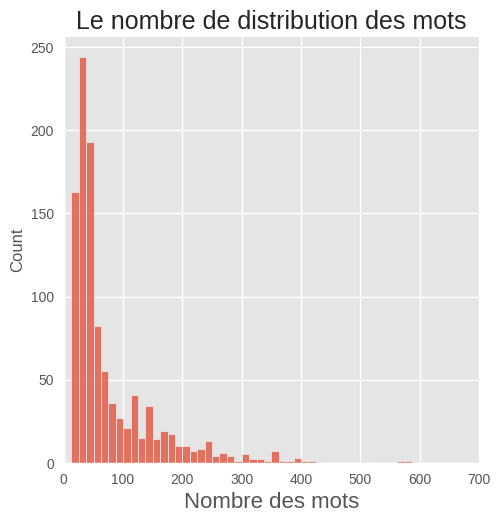

In [77]:
warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize= (8, 8))

sns.displot(df['count'])

plt.xlim(0, 700)

plt.xlabel('Nombre des mots', fontsize = 16)
plt.title("Le nombre de distribution des mots", fontsize = 18)
plt.show();

In [78]:
warnings.filterwarnings("ignore", category=FutureWarning)

df['text']=data['description']

In [79]:
warnings.filterwarnings("ignore", category=FutureWarning)

category_count = data['cat_lvl_1'].value_counts()

categories = category_count.index

categories

Index(['Home Furnishing', 'Baby Care', 'Watches', 'Home Decor & Festive Needs',
       'Kitchen & Dining', 'Beauty and Personal Care', 'Computers'],
      dtype='object', name='cat_lvl_1')

In [80]:
warnings.filterwarnings("ignore", category=FutureWarning)

df['category'] = data['cat_lvl_1']

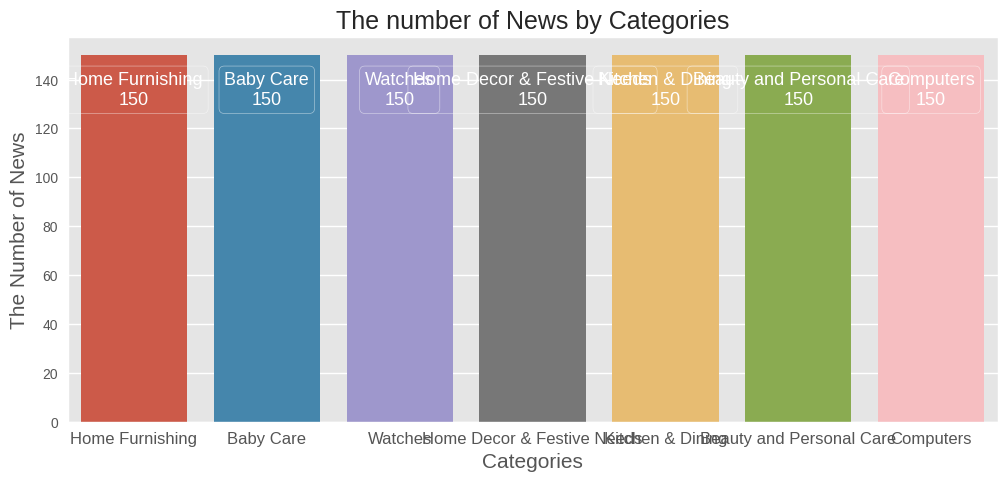

In [81]:
warnings.filterwarnings("ignore", category=FutureWarning)

fig = plt.figure(figsize= (12, 5))

ax = fig.add_subplot(111)

sns.barplot(x = category_count.index, y = category_count )

for a, p in enumerate(ax.patches):
    ax.annotate(f'{categories[a]}\n' + format(p.get_height(), '.0f'), xy = (p.get_x() + p.get_width() / 2.0, p.get_height()), xytext = (0,-25), size = 13, color = 'white' , ha = 'center', va = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round', facecolor='none',edgecolor='white', alpha = 0.5) )

plt.xlabel('Categories', size = 15)

plt.ylabel('The Number of News', size= 15)

plt.xticks(size = 12)

plt.title("The number of News by Categories" , size = 18)

plt.show()

In [82]:
warnings.filterwarnings("ignore", category=FutureWarning)

df['encoded_text'] = data['cat_lvl_1'].astype('category').cat.codes

df.head(10)
df.head(10)

,count,text,category,encoded_text
0,230,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4
1,74,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,215,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
3,145,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4
4,214,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4
5,42,Maserati Time R8851116001 Analog Watch - For ...,Watches,6
6,44,"Camerii WM64 Elegance Analog Watch - For Men,...",Watches,6
7,131,T STAR UFT-TSW-005-BK-BR Analog Watch - For B...,Watches,6
8,66,"Alfajr WY16B Youth Digital Watch - For Men, B...",Watches,6
9,63,TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...,Watches,6


In [83]:
warnings.filterwarnings("ignore", category=FutureWarning)

data_texts = df['text'].to_list()

data_labels = df['encoded_text'].to_list()

In [84]:
# Train Test Split
from sklearn.model_selection import train_test_split

train_texts, val_texts, train_labels, val_labels = train_test_split(data_texts, data_labels, test_size = 0.2, random_state = 0 )

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


train_texts, test_texts, train_labels, test_labels = train_test_split(train_texts, train_labels, test_size = 0.01, random_state = 0 )

Model Definition

In [85]:
from transformers import DistilBertTokenizerFast

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')


In [86]:
train_encodings = tokenizer(train_texts, truncation = True, padding = True  )

val_encodings = tokenizer(val_texts, truncation = True, padding = True )

In [87]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))


val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
))

In [88]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=7)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [89]:
from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments


training_args = TFTrainingArguments(
    output_dir='./results',             # output directory
    num_train_epochs=5,                 # total number of training epochs
    per_device_train_batch_size=8,      # batch size per device during training
    per_device_eval_batch_size=16,      # batch size for evaluation
    warmup_steps=500,                   # number of warmup steps for learning rate scheduler
    weight_decay=0.01,                  # strength of weight decay
    logging_dir='./logs',               # directory for storing logs
    eval_steps=10
)


In [90]:
with training_args.strategy.scope():
  trainer_model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels = 7 )

trainer = TFTrainer(
    model=trainer_model,                 # the instantiated Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,            # evaluation dataset
)

trainer.train()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [91]:
trainer.evaluate(train_dataset)

{'eval_loss': 0.04610470625070425}

In [92]:
trainer.predict(train_dataset)

PredictionOutput(predictions=array([[-0.8159512 , -1.0900629 , -0.91369855, ..., -1.3880018 ,
        -0.91526127,  5.4763193 ],
       [-1.1108205 , -1.2237508 ,  5.421906  , ..., -1.3812338 ,
        -1.1519313 , -1.0974995 ],
       [ 4.9428616 , -1.2676824 , -1.686622  , ..., -0.6092269 ,
        -1.224879  , -1.2687732 ],
       ...,
       [-1.1255823 , -1.1314361 ,  5.355749  , ..., -1.3650144 ,
        -1.0764678 , -1.1909643 ],
       [-1.1680489 , -1.1753669 , -1.1796973 , ..., -1.292264  ,
        -0.97268873, -1.4219792 ],
       [-0.8688831 , -0.3468088 , -1.8048773 , ..., -1.4600633 ,
        -0.38127384, -1.2237678 ]], dtype=float32), label_ids=array([6, 2, 0, 2, 1, 4, 5, 0, 4, 1, 4, 2, 5, 0, 1, 5, 4, 2, 3, 5, 4, 6,
       4, 0, 3, 1, 2, 0, 3, 1, 5, 6, 2, 3, 5, 3, 4, 2, 2, 1, 5, 2, 1, 0,
       4, 3, 1, 4, 6, 4, 6, 5, 0, 5, 3, 0, 5, 0, 6, 5, 0, 3, 5, 2, 6, 3,
       1, 1, 5, 1, 1, 1, 2, 3, 0, 3, 6, 2, 2, 3, 2, 6, 1, 5, 1, 3, 6, 1,
       5, 2, 4, 5, 1, 6, 4, 0, 0, 3, 6, 

In [93]:
trainer.predict(val_dataset)[1].shape

(210,)

In [94]:
output=trainer.predict(val_dataset)[1]

In [95]:
### confusion matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(val_labels,output)
cm

array([[36,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0],
       [ 0,  0, 26,  0,  0,  0,  0],
       [ 0,  0,  0, 25,  0,  0,  0],
       [ 0,  0,  0,  0, 35,  0,  0],
       [ 0,  0,  0,  0,  0, 23,  0],
       [ 0,  0,  0,  0,  0,  0, 34]])

In [96]:
from sklearn import metrics

warnings.filterwarnings("ignore", category=FutureWarning)

print(metrics.classification_report(val_labels,output))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        34

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



accuracy: 1.000
Confusion matrix, without normalization


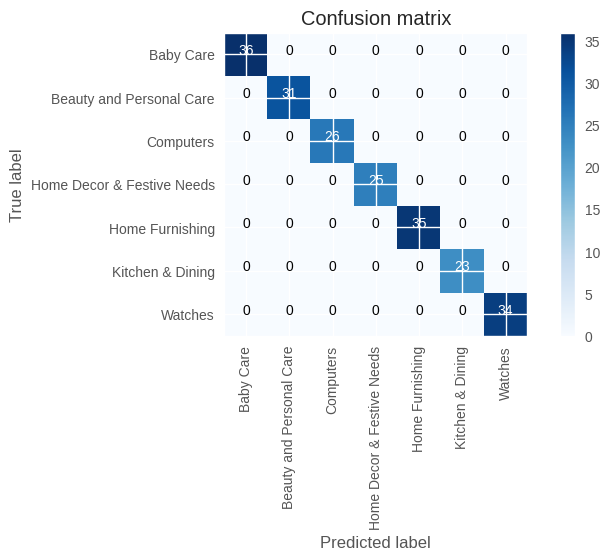

In [97]:
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay


accuracy=accuracy_score(val_labels,output)
print("accuracy: %0.3f" % accuracy)

cm = metrics.confusion_matrix(val_labels,output)
plot_confusion_matrix(cm, classes=pd.get_dummies(data['cat_lvl_1']).columns)

In [98]:
warnings.filterwarnings("ignore", category=FutureWarning)

#Saving and Loading the model
save_directory = "/saved_models"

model.save_pretrained(save_directory)

tokenizer.save_pretrained(save_directory)

('/saved_models/tokenizer_config.json',
 '/saved_models/special_tokens_map.json',
 '/saved_models/vocab.txt',
 '/saved_models/added_tokens.json',
 '/saved_models/tokenizer.json')

In [99]:
# Loading Pre-Trained Model

tokenizer_fine_tuned = DistilBertTokenizerFast.from_pretrained(save_directory)

model_fine_tuned = TFDistilBertForSequenceClassification.from_pretrained(save_directory)

Some layers from the model checkpoint at /saved_models were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at /saved_models and are newly initialized: ['dropout_59']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [100]:
test_text = test_texts[0]

test_text

'Flipkart.com: Buy Keya Seth Umbrella Protex Heat Proof Sunscreen Solution - SPF 75 PA+++ for Rs. 399 from Flipkart.com. - Lowest Prices, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!'

In [101]:
predict_input = tokenizer_fine_tuned.encode(
    test_text,
    truncation = True,
    padding = True,
    return_tensors = 'tf'
)

output = model_fine_tuned(predict_input)[0]

prediction_value = tf.argmax(output, axis = 1).numpy()[0]

prediction_value

3